In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

25e4e45bc180facfae8a1909d7c390aa86f7b3eba59fb4a9

In [140]:
data=pd.read_csv('/Users/omgajipara/Desktop/Data Science/Supervised Learning/Regression/MultipleLinearRegression/MultipleLinearRegression.csv')
print(data.head())
print(data.tail())

   YearsExperience   Age  Salary
0              1.1  21.0   39343
1              1.3  21.5   46205
2              1.5  21.7   37731
3              2.0  22.0   43525
4              2.2  22.2   39891
    YearsExperience   Age  Salary
25              9.0  34.0  105582
26              9.5  35.0  116969
27              9.6  36.0  112635
28             10.3  37.0  122391
29             10.5  38.0  121872


In [141]:
print(data.isnull().sum())

YearsExperience    0
Age                0
Salary             0
dtype: int64


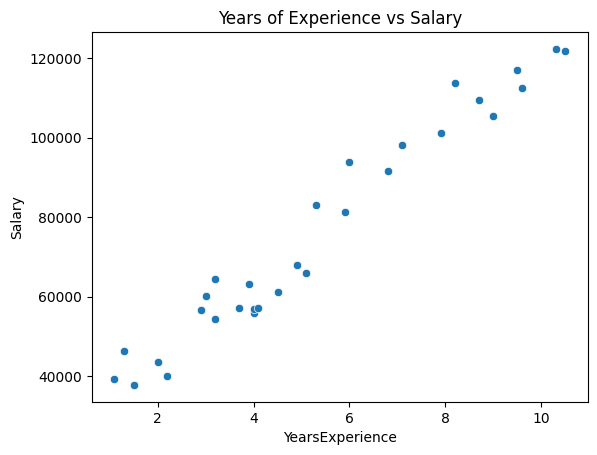

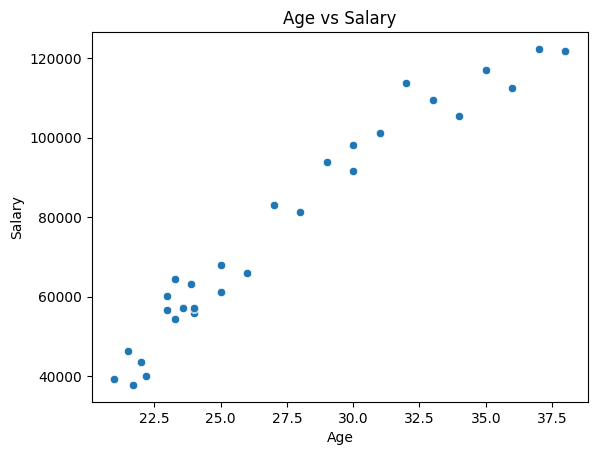

In [142]:
# For YearsExperience vs Salary
sns.scatterplot(x='YearsExperience', y='Salary', data=data)
plt.title("Years of Experience vs Salary")
plt.show()

# For Age vs Salary
sns.scatterplot(x='Age', y='Salary', data=data)
plt.title("Age vs Salary")
plt.show()


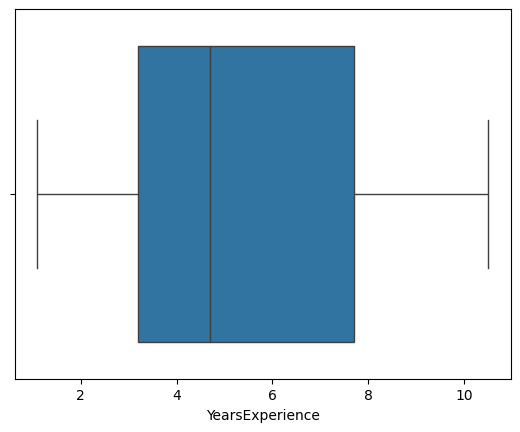

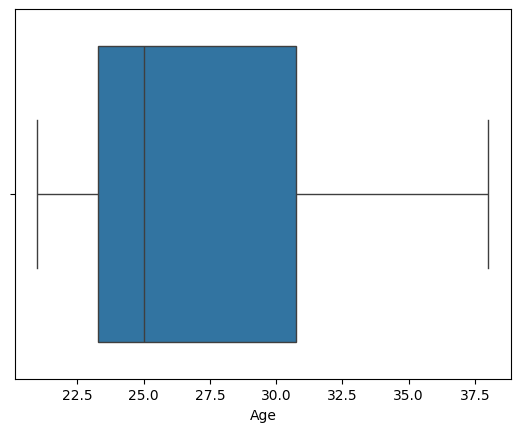

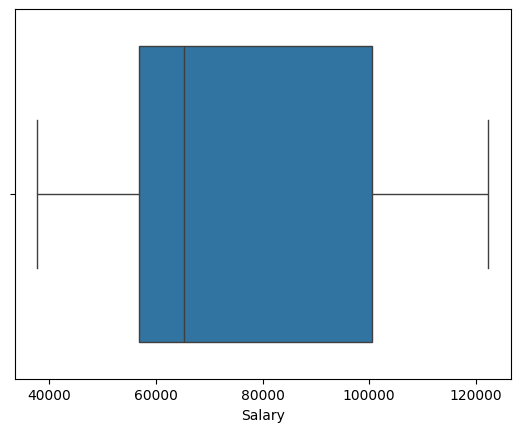

In [143]:
for i in data:
    sns.boxplot(x=i,data=data)
    plt.show()

In [144]:
x=data.iloc[:,:-1]
y=data['Salary']


scaler = StandardScaler()


# Scale X only (don't scale y usually)
X_scaled = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=85)


In [145]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [146]:
y_pred = lr.predict(x_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Coefficients
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)


R2 Score: 0.9561759680041986
MSE: 34080000.57522639
Intercept: 75929.42293941323
Coefficients: [11077.62354509 15492.16769112]


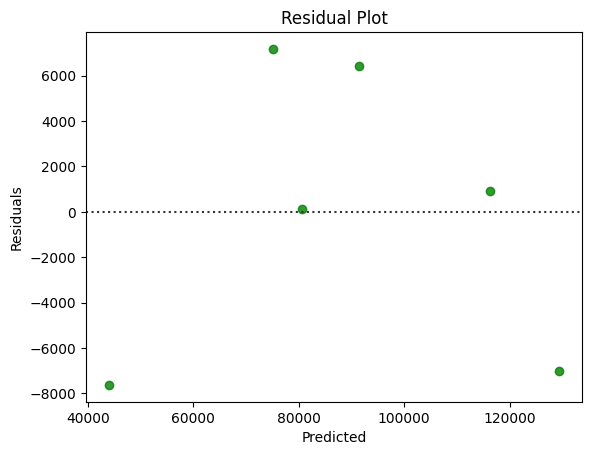

In [147]:
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, color='g')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [148]:
scaled_value = scaler.transform([[5,28]])
lr.predict(scaled_value)


/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([77076.89064052])

In [149]:
scaled = scaler.transform([[5, 28]])[0]  # This will give you [scaled_x1, scaled_x2]
scaled_x1 = scaled[0]
scaled_x2 = scaled[1]

predicted_salary = lr.intercept_ + lr.coef_[0] * scaled_x1 + lr.coef_[1] * scaled_x2
print("Predicted Salary:", predicted_salary)


Predicted Salary: 77076.89064052043


/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


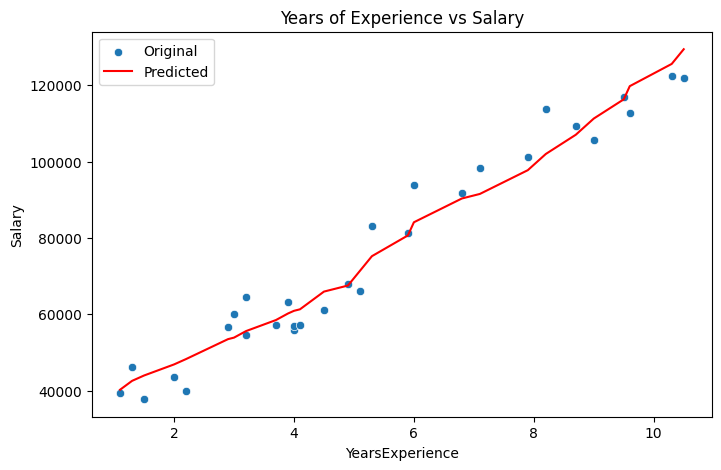

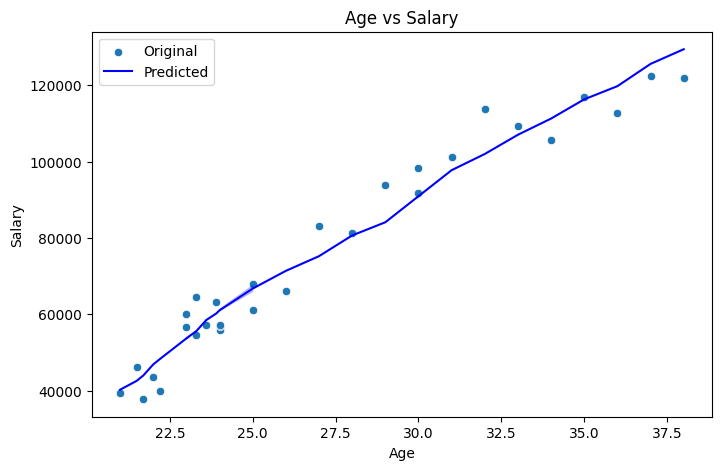

In [150]:
# Predicted salaries
yprd = lr.predict(X_scaled)

# Scatter + Line Plot: YearsExperience vs Salary
plt.figure(figsize=(8,5))
sns.scatterplot(x='YearsExperience', y='Salary', data=data, label='Original')
sns.lineplot(x='YearsExperience', y=yprd, data=data, color='red', label='Predicted')
plt.title("Years of Experience vs Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.savefig("/Users/omgajipara/Desktop/Data Science/Supervised Learning/Regression/MultipleLinearRegression/images/ExperiencevsSalary.jpg")
plt.show()

# Scatter + Line Plot: Age vs Salary
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Salary', data=data, label='Original')
sns.lineplot(x='Age', y=yprd, data=data, color='blue', label='Predicted')
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.savefig("/Users/omgajipara/Desktop/Data Science/Supervised Learning/Regression/MultipleLinearRegression/images/AgevsSalary.jpg")

plt.show()


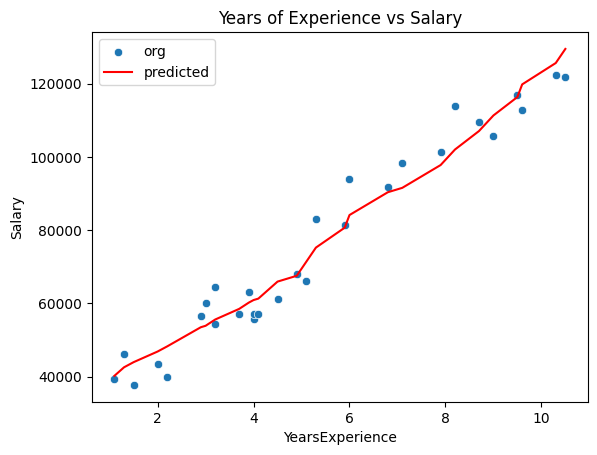

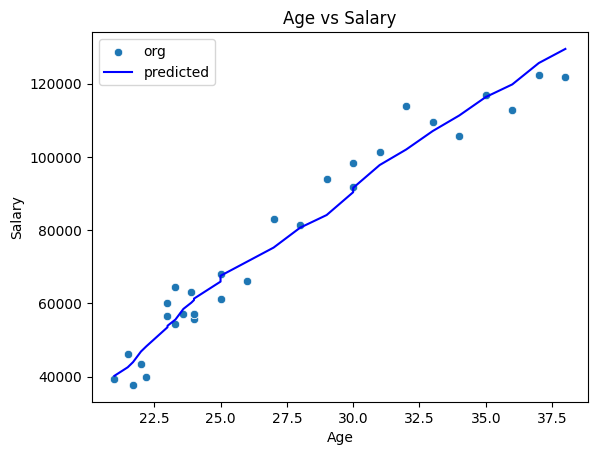

In [151]:
# For YearsExperience vs Salary
sns.scatterplot(x='YearsExperience', y='Salary', data=data)
yprd=lr.predict(X_scaled)

plt.title("Years of Experience vs Salary")
plt.plot(data['YearsExperience'],yprd,c='red')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend(['org','predicted'])
plt.show()

# For Age vs Salary
sns.scatterplot(x='Age', y='Salary', data=data)
yprd=lr.predict(X_scaled)
plt.plot(data['Age'],yprd,c='blue')
plt.legend(['org','predicted'])
plt.title("Age vs Salary")
plt.show()
